<div class="alert alert-block alert-success">
<H1>
Agenda</H1>
    
1. Simple Decision Tree on Iris Data
2. Tree Pruning
3. Decision Tree on Campaign Data (only Numeric Variables)
4. Decision Tree Hyperparameters
5. Accuracy versus Other Metrics - Precision and Recall: Where to use which metric
6. Handling Object variables (creating Dummy variables)
7. Pruning using Hyperparameters returned by Grid-Search
8. Handling Unbalanced dataset - using SMOTE

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_data.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [6]:
iris_data.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [7]:
iris_data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [8]:
iris_data.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
X_train,X_test,y_train,y_test = train_test_split(iris_data.iloc[:,:-1],iris_data['species'],test_size=0.20,random_state=10)

In [10]:
y_train

58     versicolor
97     versicolor
129     virginica
114     virginica
146     virginica
          ...    
113     virginica
64     versicolor
15         setosa
125     virginica
9          setosa
Name: species, Length: 120, dtype: object

In [11]:
iris_model = tree.DecisionTreeClassifier(random_state = 2)
iris_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [12]:
y_train.value_counts()

virginica     43
setosa        40
versicolor    37
Name: species, dtype: int64

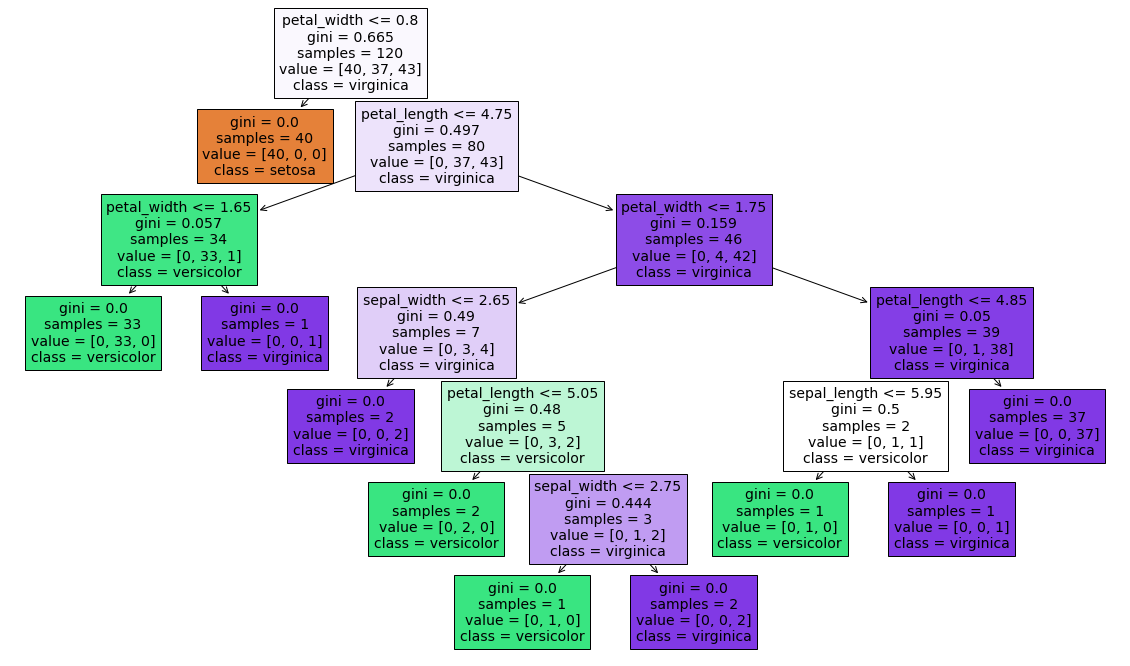

In [13]:
plt.figure(figsize=(20,12))
tree.plot_tree(iris_model, filled=True,feature_names = X_train.columns,class_names=['setosa','versicolor','virginica']);
plt.show()

## Performance on Training Dataset

In [14]:
y_train_predicted = iris_model.predict(X_train)
print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [15]:
confusion_matrix(y_train,y_train_predicted)

array([[40,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 43]], dtype=int64)

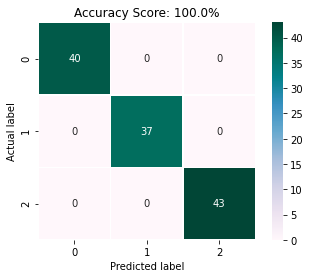

In [16]:
sns.heatmap(confusion_matrix(y_train,y_train_predicted),annot=True,cmap='PuBuGn',linewidths=.5,square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str(round(iris_model.score(X_train,y_train)*100,2))+"%")
plt.show()

## Performance on Test Dataset

In [17]:
y_test_predicted = iris_model.predict(X_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



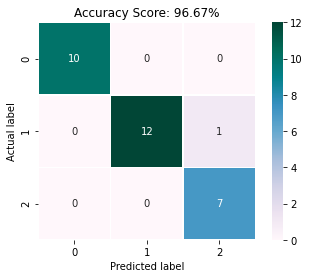

In [18]:
sns.heatmap(confusion_matrix(y_test,y_test_predicted),annot=True,cmap='PuBuGn',linewidths=.5,square = True);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str(round(iris_model.score(X_test,y_test)*100,2))+"%")
plt.show()

In [19]:
iris_model.score(X_test,y_test)

0.9666666666666667

## Creating a User Defined function to compare model performance on Train and Test samples

In [20]:
def compare_train_test(model):
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    cr_train = classification_report(y_train,y_train_predicted)
    cr_test = classification_report(y_test,y_test_predicted)
    print(round(model.score(X_train,y_train)*100,2),cr_train,'\n',round(model.score(X_test,y_test)*100,2),cr_test)

In [21]:
compare_train_test(iris_model)

100.0               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120
 
 96.67               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Decision Tree on Campaign Data

In [22]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
os.chdir(r"D:\Work\B2B\Aditya Group\Module 03 Lectures\Decision Trees 0322")
df = pd.read_csv('campaign_data.csv',sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Dictionary
* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* 4 - education (categorical: "unknown","secondary","primary","tertiary")
* 5 - default: has credit in default? (binary: "yes","no")
* 6 - balance: average yearly balance (numeric)
* 7 - housing: has housing loan? (binary: "yes","no")
* 8 - loan: has personal loan? (binary: "yes","no")

    #### Related with the last contact of the current campaign:
* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
* 10 - day: last contact day of the month (numeric)
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* 12 - duration: last contact duration, in seconds (numeric)

    #### Other attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Replacing all Yes/No flags with 1/0 values

In [23]:
df.replace({'no':0,'yes':1},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [24]:
df['y'].mean()

0.11523999115239991

In [25]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [26]:
df['y'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y, dtype: float64

### Applying capping on the 'Balance' variable

In [27]:
conditions = [df['balance']<-700,(df['balance']>=-700)&(df['balance']<=14200),df['balance']>14200]
labels = [-700,df['balance'],14200]
df['balance_new'] = np.select(conditions,labels)

In [28]:
df['balance'].describe([0.01,0.05,0.95,0.99]).round()

count     4521.0
mean      1423.0
std       3010.0
min      -3313.0
1%        -671.0
5%        -162.0
50%        444.0
95%       6102.0
99%      14195.0
max      71188.0
Name: balance, dtype: float64

In [29]:
df['balance_new'].describe([0.01,0.05,0.95,0.99]).round()

count     4521.0
mean      1356.0
std       2426.0
min       -700.0
1%        -671.0
5%        -162.0
50%        444.0
95%       6102.0
99%      14179.0
max      14200.0
Name: balance_new, dtype: float64

### Selecting only the Numeric variables to build the Decision Tree (as object variables need to be handled by one hot encoding)

In [30]:
df.select_dtypes(include='number').head(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,balance_new
0,30,0,1787,0,0,19,79,1,-1,0,0,1787
1,33,0,4789,1,1,11,220,1,339,4,0,4789
2,35,0,1350,1,0,16,185,1,330,1,0,1350


In [31]:
X = df.select_dtypes(include='number')
X = X.drop(['balance','day','y'],axis=1)
X.head(3)

,age,default,housing,loan,duration,campaign,pdays,previous,balance_new
0,30,0,0,0,79,1,-1,0,1787
1,33,0,1,1,220,1,339,4,4789
2,35,0,1,0,185,1,330,1,1350


In [32]:
y = df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_test

,age,default,housing,loan,duration,campaign,pdays,previous,balance_new
2398,51,1,0,1,123,6,-1,0,-700
800,50,0,0,0,510,2,2,5,2881
2288,50,0,0,0,131,3,-1,0,1412
2344,37,0,1,0,247,13,-1,0,0
3615,31,0,0,0,343,2,-1,0,757
...,...,...,...,...,...,...,...,...,...
3188,38,0,1,0,218,1,-1,0,86
3218,49,0,0,1,281,3,-1,0,1916
2767,47,0,0,0,454,6,-1,0,1121
498,38,0,0,1,587,2,-1,0,258


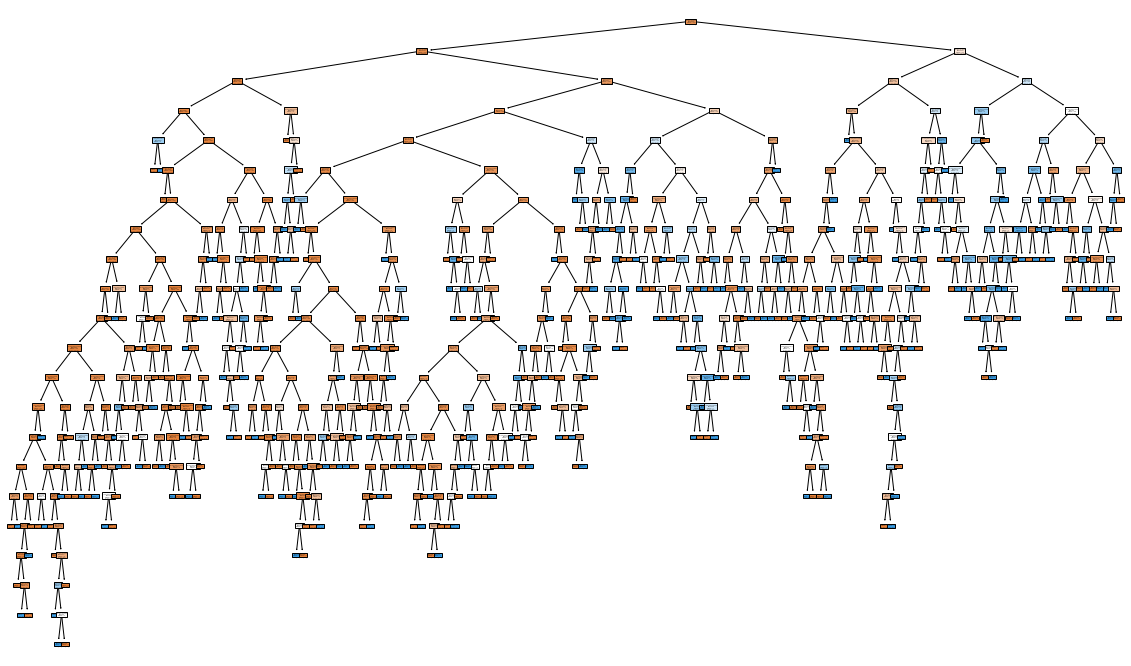

In [35]:
response_model = tree.DecisionTreeClassifier(random_state = 1)
response_model.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model, filled=True,feature_names = X_train.columns);
plt.show()

## Important arguments in DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Sr.no | Argument      | Description 
--|:---------:|:-----------:
1|__max_depth__      | The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples      
2|__min_samples_split__   | The minimum number of samples required to split an internal node
3|__min_samples_leaf__ | A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches
4|__criterion__ | The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain
5|__max_features__ | The number of features to consider when looking for the best split
6|__max_leaf_nodes__ | Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes
7|__random_state__ | ----------

In [36]:
compare_train_test(response_model)

100.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2994
           1       1.00      1.00      1.00       396

    accuracy                           1.00      3390
   macro avg       1.00      1.00      1.00      3390
weighted avg       1.00      1.00      1.00      3390
 
 85.23               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1006
           1       0.36      0.43      0.39       125

    accuracy                           0.85      1131
   macro avg       0.64      0.67      0.65      1131
weighted avg       0.86      0.85      0.86      1131



## Pruning Tree : By specifying the 'min_samples_leaf' criteria

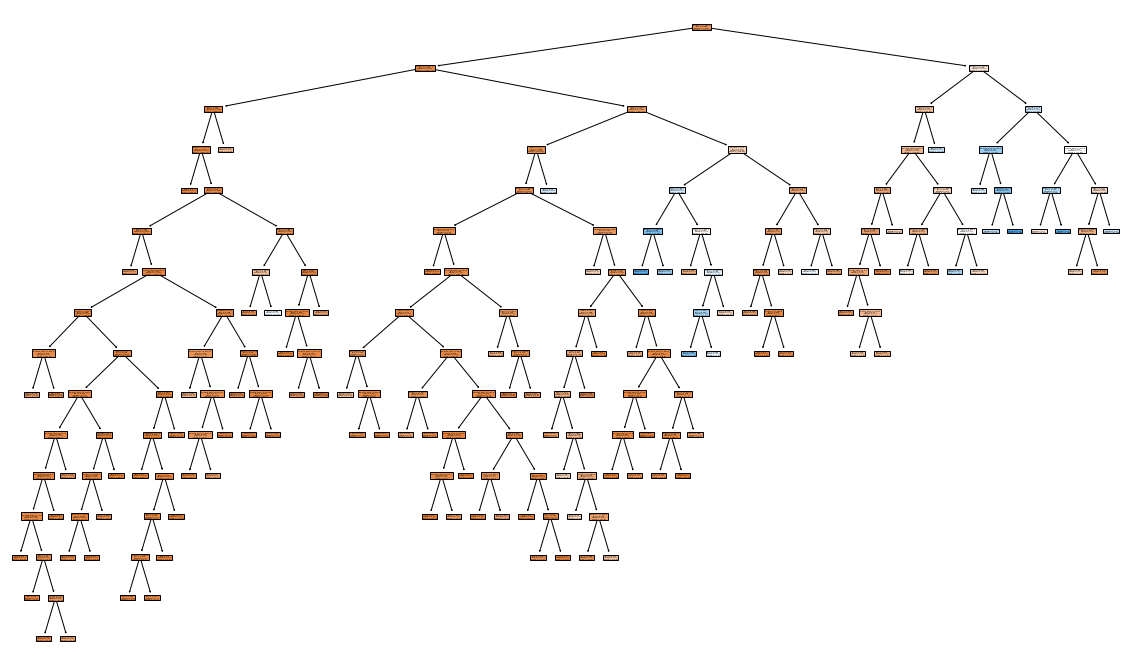

In [37]:
response_model_pruned = tree.DecisionTreeClassifier(random_state = 1,min_samples_leaf=15)
response_model_pruned.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_pruned, filled=True,feature_names = X_train.columns);
plt.show()

In [38]:
compare_train_test(response_model_pruned)

90.71               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2994
           1       0.64      0.47      0.54       396

    accuracy                           0.91      3390
   macro avg       0.79      0.72      0.74      3390
weighted avg       0.90      0.91      0.90      3390
 
 88.42               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1006
           1       0.47      0.36      0.41       125

    accuracy                           0.88      1131
   macro avg       0.70      0.65      0.67      1131
weighted avg       0.87      0.88      0.88      1131



<div class="alert alert-block alert-success">
<H2>
Key Observations</H2>
    
1. **Model Accuracy on Train sample has come down** - Because of pruning done using 'min_samples_leaf' hyper-paramter, the Tree is no more creating leaf nodes with size <15. In a way it is ignoring the noise associated with these few points and focussing more to capture the overall pattern. This causes some of the model predictions to go wrong on Train dataset (which is why Accuracy is no more 100%)
2. **Model Accuracy on Test sample has gone up** - Due to the above mentioned reasons the degree of overfitting has come down, which makes the model more generalizable to an unseen data (for e.g the Test sample), thus showing a better performance on the Test sample
3. The process henceforth is purely iterative, where one needs to try a combination of Hyperparameters (and their values) to come up with a Decision Tree that performs equally well on both Train and Test samples

<div class="alert alert-block alert-danger">
<h2>
Accuracy versus other Metrics (Precision or Recall)</h2>

A critial aspect here is to decide which metric to use for model performance evaluation, as Accuracy can be deceving at times, especially when there is a Class Imbalance. Let's understand it with a different example

<div class="alert alert-block alert-info">
<h3>
Example 01 : Predicting if patients will develop a Serious Disease in future based on the current health conditions</h3>
    
 * Training data of 10k patients is used to develop a Classification model out of which only 10 actually have the disease
 * Thus there are Two classes in total (patients with disease, let's say class=1, and patients not with the disease, let's say class=0)
 * Objective is to build a Decision Tree, which can correctly tell which patients are most likely to develop the disease later
 * _**Idea here it to demonstrate, that even if we create a very dumb model which only predicts 'Patient is healthy', we will achieve a very high Accuracy**_

In [39]:
#-------Creating the confusion matrix, where the model predicts every patient as Healthy
A = np.array([[9990,0],[10,0]])
A

array([[9990,    0],
       [  10,    0]])

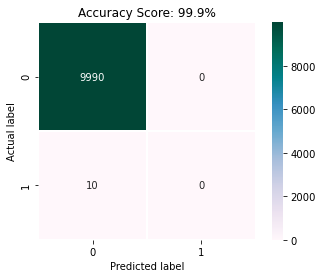

In [40]:
#-------Showing the same confusion matrix in Heat Map
sns.heatmap(A,annot=True,cmap='PuBuGn',linewidths=.5,square = True,fmt='g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str((9990/10000)*100)+"%")
plt.show()

<div class="alert alert-block alert-warning">
<H3>
The model has clearly failed to identify any of the 10 (actual) Diseased patients, even though its accuracy is ~ 99.99% </H3>
    
 * A Perfect Model here would be the one that can correctly predict all of these 10 Dieasesd Patients
 * While developing a better model (compared to the earlier 'Dumb' model), we should be clear whether reducing False Positives should be our focus area or reducing the False Negatives. In this example these case be defined as :
  * **False Positives** (patients who are predicted as Diseased, but are actually healthy)
  * **False Negatives** (patients who are predicted as Healthy, but are actually Diseased)
 * Clearly one does not want to risk telling an actual diseased patient that they are healthy, as without a treatment it may get too late for them. The reverse (telling an actual healthy patient that they are diseased) is less risky as it will not pose any life threats
 * <b>So it's clear that reducing False Negatives is a clear Priority here</b>
 * Let's also see which of the Precision or Recall metrics would become more important
 * Precision is defined as 
    $$ Precision = \frac{TP}{TP+FP} $$
 * Recall is defined as 
    $$ Recall = \frac{TP}{TP+FN} $$
 <br>
 * <H4>One can also deduce that Recall is the right metric to assess model's performance in this example (as Recall increases with a decrease in FN)</H4>
</div>

<div class="alert alert-block alert-info">
<h3>
Example 02 : Predicting whether Customers will Respond to a future Marketing Campaign</h3>

In this example FP and FN be defined as (based on historical data):
  * **False Positives** (customers who are predicted as Responders, but did not actually respond)
  * **False Negatives** (customers who are predicted as Non-Responders, but actually Responded)
  ***
  * If the Agency refers to a classification model that gave more False Positives, then there is a good chance that the agency will spend their time and money (operations costs in running the campaign) talking to the customers who will Actually not respond. This will clearly not help them achieve a good ROI (return on invested effort and money)
  * On the other hand if a Model with high False Negatives are used, the agency will end up NOT contacting a lot of customers (as the model would predict them as Negatives) and would incur an opportunity loss (a notional value)
  * Overall, the agency would like to maximize the chance of converting all the contacted customers, which is where they would need to be precise in selecting the right set of customers to begin with
  * <b>This makes it clear that reducing False Positives is a clear Priority here</b>
  * <H4>One can thus deduce that Precision is the right metric to assess model's performance in this example</H4>
</div>


# Including the Object Variables

In [41]:
df.select_dtypes(include='object').head(3)

,job,marital,education,contact,month,poutcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure


In [42]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

## Using pd.get_dummies to create Dummy variables (1/0 flags) for individual categories
 * For the below variable 'contact' we get 3 dummy variables, i.e. 1 each for its unique categories

In [43]:
pd.get_dummies(df['marital'])

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


<div class="alert alert-block alert-danger">
<h2> Dummy Variable Alert </h2>
    
* After converting the variable 'marital', we don't need all the 3 dummy variables, since by using any two variables, the third can be created. For e.g. when both divorced and married are 0, it represents the rows where the variable 'single' is 1 (see below summary for a better understanding)
* **Later we'll drop 1 variable each from every set of Dummy variables created for the Object variables**

In [44]:
pd.get_dummies(df['marital']).groupby(['divorced','married','single']).size().reset_index()

,divorced,married,single,0
0,0,0,1,1196
1,0,1,0,2797
2,1,0,0,528


In [45]:
#--------The below summary will help us decide, which category should be dropped--------
for i in df.select_dtypes(include='object').columns:
    print(i,df.groupby(i).agg({'y':['mean','count']}).sort_values(('y',  'mean'),ascending=False),'\n')

job                       y      
                   mean count
job                          
retired        0.234783   230
student        0.226190    84
unknown        0.184211    38
management     0.135191   969
housemaid      0.125000   112
admin.         0.121339   478
self-employed  0.109290   183
technician     0.108073   768
unemployed     0.101562   128
services       0.091127   417
entrepreneur   0.089286   168
blue-collar    0.072939   946 

marital                  y      
              mean count
marital                 
divorced  0.145833   528
single    0.139632  1196
married   0.099035  2797 

education                   y      
               mean count
education                
tertiary   0.142963  1350
secondary  0.106245  2306
unknown    0.101604   187
primary    0.094395   678 

contact                   y      
               mean count
contact                  
telephone  0.146179   301
cellular   0.143646  2896
unknown    0.046073  1324 

month               y   

### Creating Dummy variables for all Object variables

In [46]:
obj_cols = list(df.select_dtypes(include='object').columns)
obj_cols.remove('month')
obj_cols

['job', 'marital', 'education', 'contact', 'poutcome']

In [47]:
#-------Displaying all columns in a DataFrame-----
pd.options.display.max_columns = None

In [48]:
pd.get_dummies(data=df,columns=obj_cols)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,balance_new,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,oct,79,1,-1,0,0,1787,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
1,33,0,4789,1,1,11,may,220,1,339,4,0,4789,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,35,0,1350,1,0,16,apr,185,1,330,1,0,1350,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
3,30,0,1476,1,1,3,jun,199,4,-1,0,0,1476,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,59,0,0,1,0,5,may,226,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,jul,329,5,-1,0,0,-333,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4517,57,1,-3313,1,1,9,may,153,1,-1,0,0,-700,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4518,57,0,295,0,0,19,aug,151,11,-1,0,0,295,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4519,28,0,1137,0,0,6,feb,129,4,211,3,0,1137,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [49]:
new_df = pd.get_dummies(data=df,columns=obj_cols)
new_df.shape

(4521, 39)

In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   default              4521 non-null   int64 
 2   balance              4521 non-null   int64 
 3   housing              4521 non-null   int64 
 4   loan                 4521 non-null   int64 
 5   day                  4521 non-null   int64 
 6   month                4521 non-null   object
 7   duration             4521 non-null   int64 
 8   campaign             4521 non-null   int64 
 9   pdays                4521 non-null   int64 
 10  previous             4521 non-null   int64 
 11  y                    4521 non-null   int64 
 12  balance_new          4521 non-null   int64 
 13  job_admin.           4521 non-null   uint8 
 14  job_blue-collar      4521 non-null   uint8 
 15  job_entrepreneur     4521 non-null   uint8 
 16  job_ho

In [51]:
new_df = new_df.drop(['balance','day','month','y',
                      'job_unknown','marital_married','education_unknown','contact_telephone','poutcome_unknown'],axis=1)
new_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,balance_new,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_unknown,poutcome_failure,poutcome_other,poutcome_success
0,30,0,0,0,79,1,-1,0,1787,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,33,0,1,1,220,1,339,4,4789,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
2,35,0,1,0,185,1,330,1,1350,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,30,0,1,1,199,4,-1,0,1476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,59,0,1,0,226,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [52]:
X_train,X_test,y_train,y_test=train_test_split(new_df,y,test_size=0.25,random_state=42)

In [53]:
X_train.shape

(3390, 30)

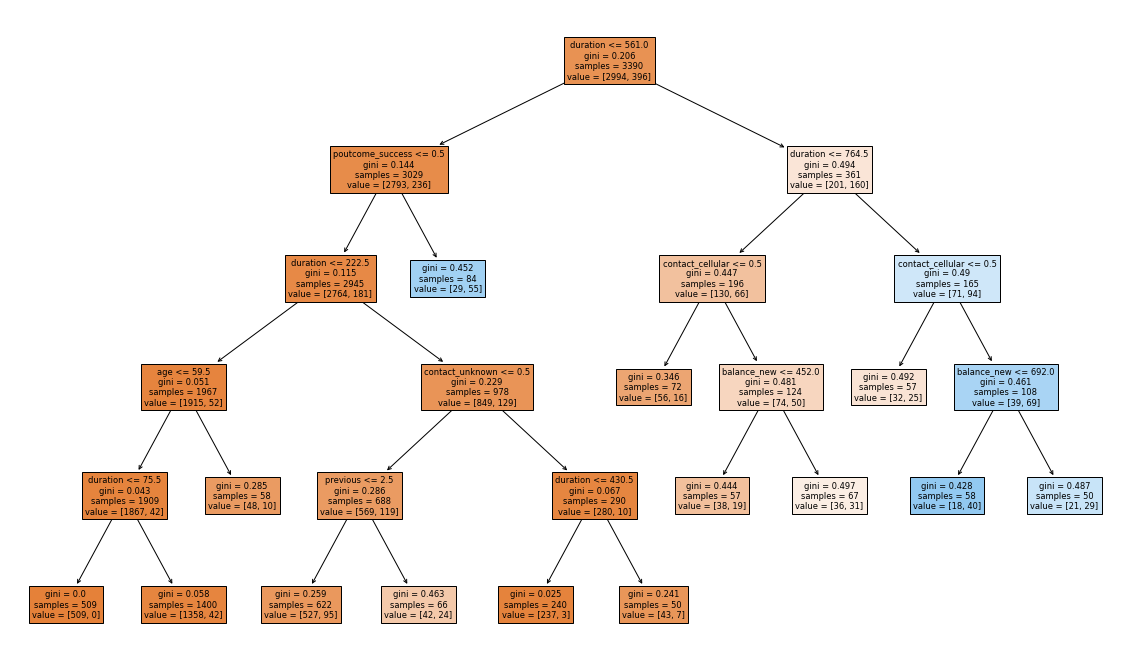

In [54]:
response_model_new = tree.DecisionTreeClassifier(random_state = 2,min_samples_leaf=50,max_depth=5)
response_model_new.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_new, filled=True,feature_names = X_train.columns);
plt.show()

In [55]:
compare_train_test(response_model_new)

89.97               precision    recall  f1-score   support

           0       0.91      0.98      0.95      2994
           1       0.65      0.31      0.42       396

    accuracy                           0.90      3390
   macro avg       0.78      0.65      0.68      3390
weighted avg       0.88      0.90      0.88      3390
 
 89.83               precision    recall  f1-score   support

           0       0.92      0.98      0.94      1006
           1       0.58      0.28      0.38       125

    accuracy                           0.90      1131
   macro avg       0.75      0.63      0.66      1131
weighted avg       0.88      0.90      0.88      1131



# Using GridSearch for getting suggestions on Hyperparameter values
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

### Manually Specifying the Hyperparmeters and their respective values to be tested for best performance

In [57]:
variable_options = {'max_depth':range(4,9), 'min_samples_leaf':[20,30,40,50,75,100], 'criterion':['gini','entropy']}
variable_options

{'max_depth': range(4, 9),
 'min_samples_leaf': [20, 30, 40, 50, 75, 100],
 'criterion': ['gini', 'entropy']}

### Using the GridSearchCV function and finding the best combination which maximizes the model scoring criteria (can be set as Accuracy, Precision or Recall) - Cross-validation is also used

In [58]:
response_model_new = tree.DecisionTreeClassifier(random_state = 2)
gs = GridSearchCV(response_model_new,variable_options,cv=5,scoring='precision')
gs.fit(X_train,y_train)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 40}

### Choosing the above Hyperparameter values and creating the Decision Tree

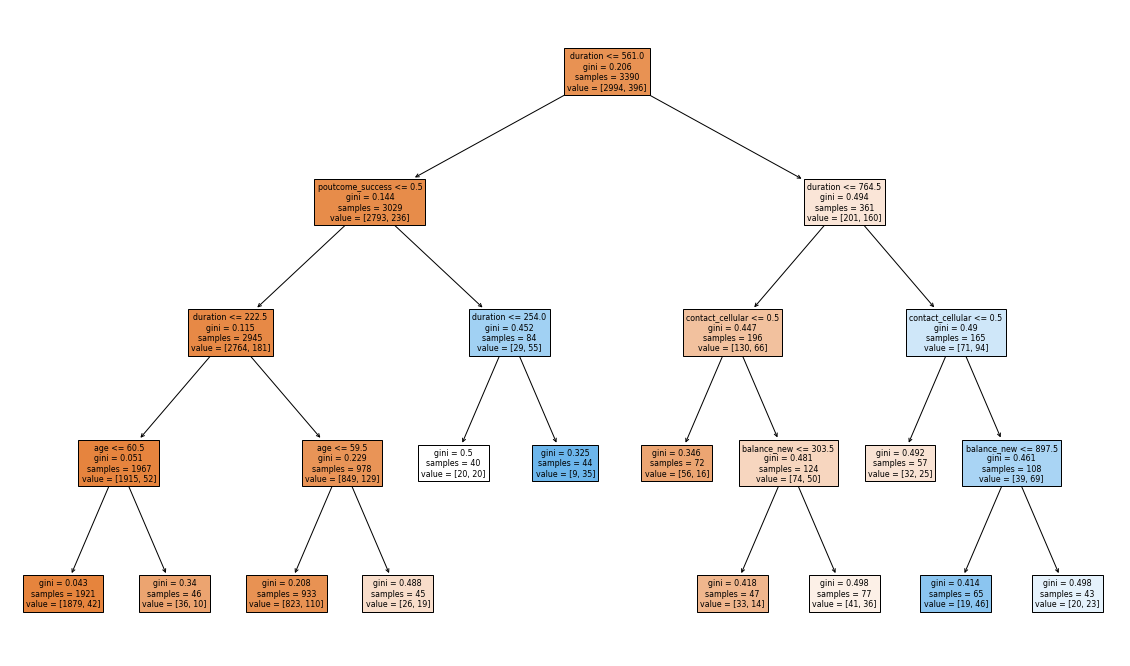

In [59]:
response_model_new = tree.DecisionTreeClassifier(random_state = 1,criterion='gini',max_depth=4,min_samples_leaf=40)
response_model_new.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_new, filled=True,feature_names = X_train.columns);
plt.show()

In [60]:
compare_train_test(response_model_new)

89.97               precision    recall  f1-score   support

           0       0.91      0.98      0.95      2994
           1       0.68      0.26      0.38       396

    accuracy                           0.90      3390
   macro avg       0.80      0.62      0.66      3390
weighted avg       0.88      0.90      0.88      3390
 
 89.74               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1006
           1       0.60      0.21      0.31       125

    accuracy                           0.90      1131
   macro avg       0.76      0.60      0.63      1131
weighted avg       0.88      0.90      0.87      1131



# Handling data imbalance - Using SMOTE

In [61]:
#----pip install -U imbalanced-learn

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
sm = SMOTE(sampling_strategy='minority')

In [64]:
new_df.shape

(4521, 30)

In [65]:
y.shape

(4521,)

In [66]:
new_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,balance_new,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_unknown,poutcome_failure,poutcome_other,poutcome_success
0,30,0,0,0,79,1,-1,0,1787,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,33,0,1,1,220,1,339,4,4789,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
2,35,0,1,0,185,1,330,1,1350,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,30,0,1,1,199,4,-1,0,1476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,59,0,1,0,226,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## Resampling to increase the y=1 cases

In [67]:
X_smote,y_smote = sm.fit_resample(new_df,y)

In [68]:
X_smote.shape

(8000, 30)

In [69]:
y_smote.shape

(8000,)

In [70]:
y_smote.value_counts()

0    4000
1    4000
Name: y, dtype: int64

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.25,random_state=42,stratify=y_smote)

In [72]:
y_train.value_counts()

0    3000
1    3000
Name: y, dtype: int64

### Building a basic tree with just only one Hyperparameter used for Pruning

In [73]:
response_model_smote = tree.DecisionTreeClassifier(random_state = 2,min_samples_leaf=30)
response_model_smote.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=30, random_state=2)

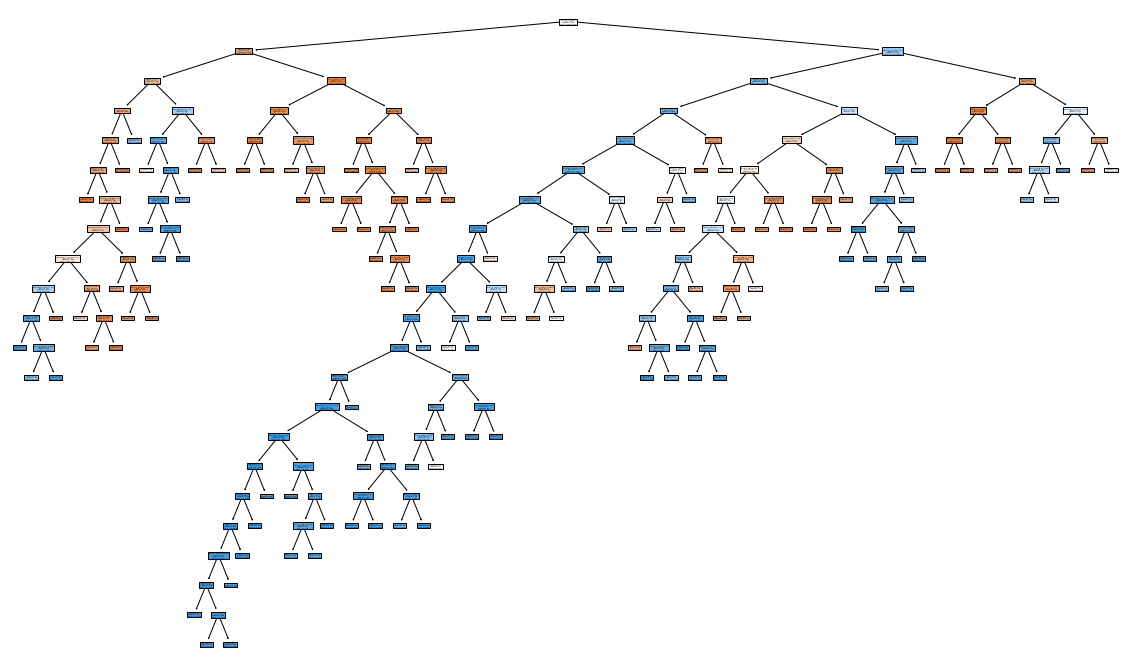

In [74]:
response_model_smote.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_smote, filled=True,feature_names = X_train.columns);
plt.show()

In [75]:
compare_train_test(response_model_smote)

90.13               precision    recall  f1-score   support

           0       0.90      0.91      0.90      3000
           1       0.91      0.89      0.90      3000

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000
 
 86.9               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1000
           1       0.88      0.85      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



### Using GridSearch to get best hyperparameters

In [76]:
variable_options = {'max_depth':range(4,11), 'min_samples_leaf':range(25,101), 'criterion':['gini','entropy']}
response_model_final = tree.DecisionTreeClassifier(random_state = 2)
gs = GridSearchCV(response_model_final,variable_options,cv=5,scoring='precision')
gs.fit(X_train,y_train)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 26}

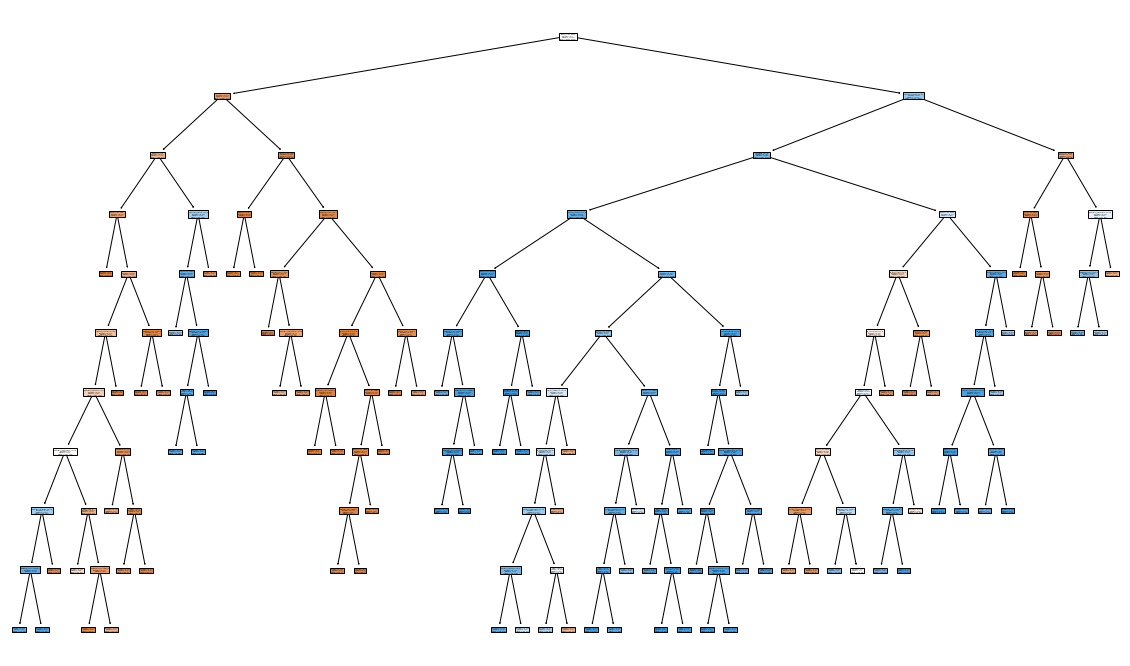

In [77]:
response_model_final = tree.DecisionTreeClassifier(random_state = 2,max_depth = 10,criterion='entropy', min_samples_leaf=43)
response_model_final.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_final, filled=True,feature_names = X_train.columns);
plt.show()

In [78]:
compare_train_test(response_model_final)

89.08               precision    recall  f1-score   support

           0       0.90      0.88      0.89      3000
           1       0.88      0.90      0.89      3000

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000
 
 87.0               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.86      0.88      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



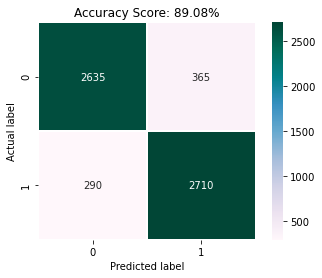

In [79]:
y_train_predicted = response_model_final.predict(X_train)
y_test_predicted = response_model_final.predict(X_test)

sns.heatmap(confusion_matrix(y_train,y_train_predicted),annot=True,cmap='PuBuGn',linewidths=.5,square = True,fmt='g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str(round(response_model_final.score(X_train,y_train)*100,2))+"%")
plt.show()

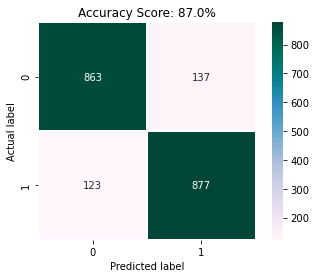

In [80]:
sns.heatmap(confusion_matrix(y_test,y_test_predicted),annot=True,cmap='PuBuGn',linewidths=.5,square = True,fmt='g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: "+str(round(response_model_final.score(X_test,y_test)*100,2))+"%")
plt.show()